In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_paths = {
    "COT": {
        "aime24": "COT/aime24_COT.csv",
        "gpqa": "COT/gpqa_COT.csv",
        "math500": "COT/math500_COT.csv",
    },
    "Standard": {
        "aime24": "Standard/aime24_Standard.csv",
        "gpqa": "Standard/gpqa_Standard.csv",
        "math500": "Standard/math500_Standard.csv",
    },
    "ZeroShot": {
        "aime24": "ZeroShot/aime24_ZeroShot.csv",
        "gpqa": "ZeroShot/gpqa_ZeroShot.csv",
        "math500": "ZeroShot/math500_ZeroShot.csv",
    },
    "COD": {
        "aime24": "COD/aime24_COD.csv",
        "gpqa": "COD/gpqa_COD.csv",
        "math500": "COD/math500_COD.csv",
    },
    "SFT_1e4": {
        "aime24": "SFT/aime24_1e4_sft.csv",
        "gpqa": "SFT/gpqa_1e4_sft.csv",
        "math500": "SFT/math500_1e4_sft.csv",
    },
    "SFT_1e5": {
        "aime24": "SFT/aime24_1e5_sft.csv",
        "gpqa": "SFT/gpqa_1e5_sft.csv",
        "math500": "SFT/math500_1e5_sft.csv",
    },
    "SFT_1e6": {
        "aime24": "SFT/aime24_1e6_sft.csv",
        "gpqa": "SFT/gpqa_1e6_sft.csv",
        "math500": "SFT/math500_1e6_sft.csv",
    },
    "SFT_2e4": {
        "aime24": "SFT/aime24_2e4_sft.csv",
        "gpqa": "SFT/gpqa_2e4_sft.csv",
        "math500": "SFT/math500_2e4_sft.csv",
    },
    "SFT_5e6": {
        "aime24": "SFT/aime24_5e6_sft.csv",
        "gpqa": "SFT/gpqa_5e6_sft.csv",
        "math500": "SFT/math500_5e6_sft.csv",
    },
    "R1": {
        "aime24": "R1/aime24_ZeroShot_R1.csv",
        "gpqa": "R1/gpqa_ZeroShot_R1.csv",
        "math500": "R1/math500_ZeroShot_R1.csv",
    },
}


COT


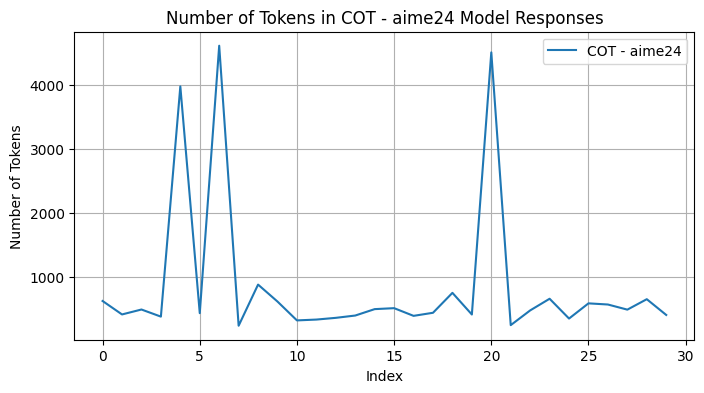

Number of spikes in COT - aime24: 3


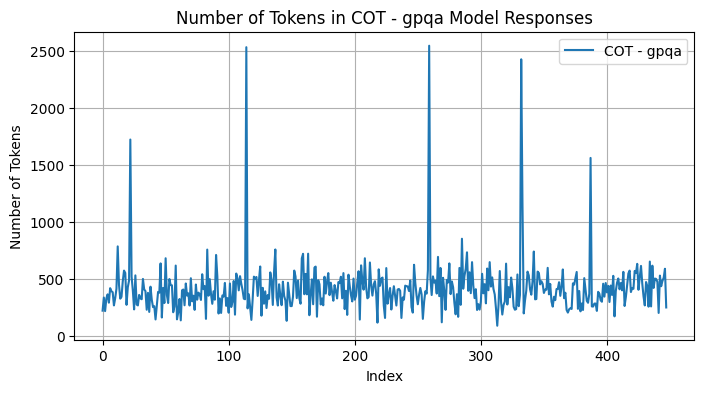

Number of spikes in COT - gpqa: 5


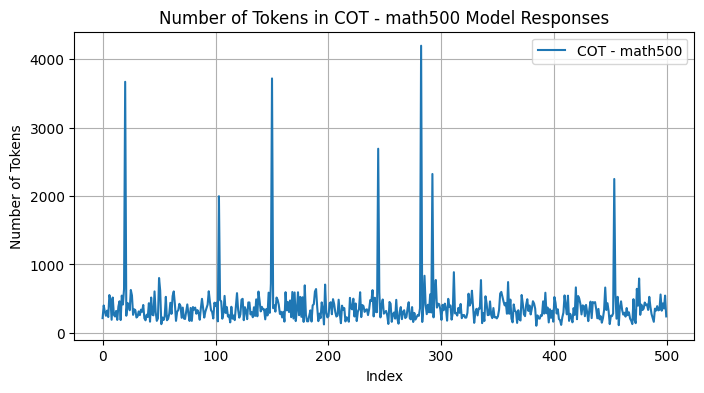

Number of spikes in COT - math500: 7
Standard


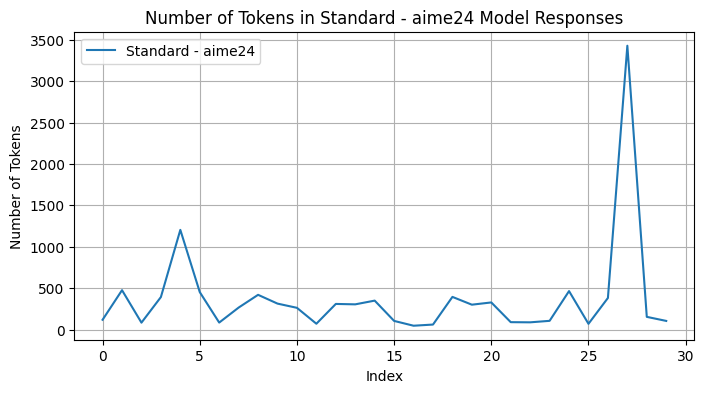

Number of spikes in Standard - aime24: 1


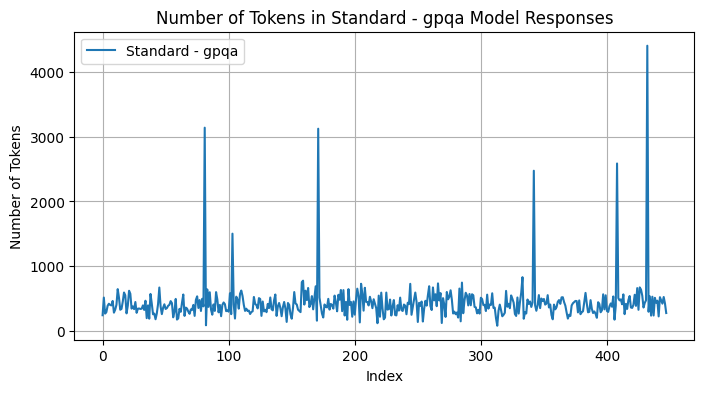

Number of spikes in Standard - gpqa: 6


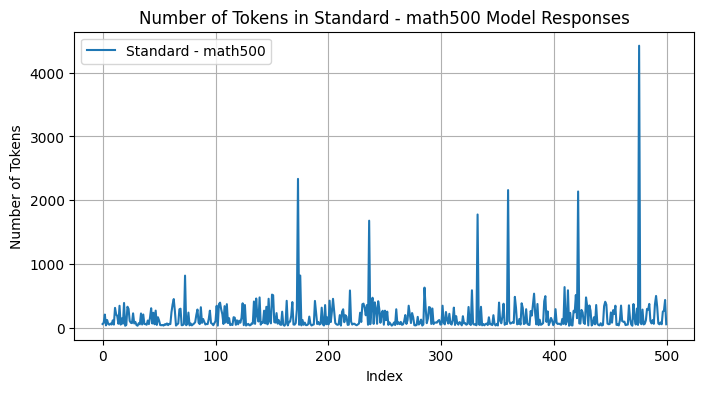

Number of spikes in Standard - math500: 27
ZeroShot


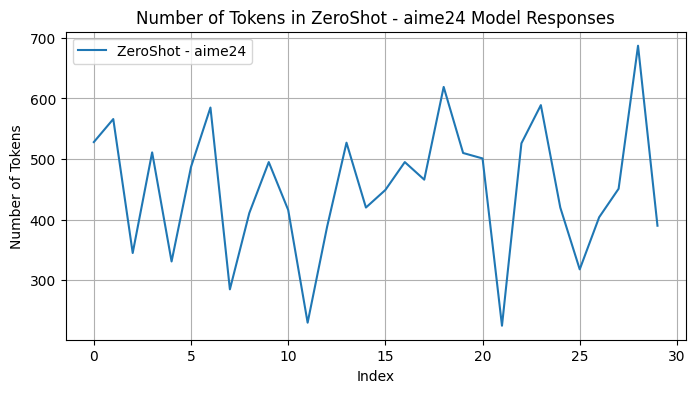

Number of spikes in ZeroShot - aime24: 0


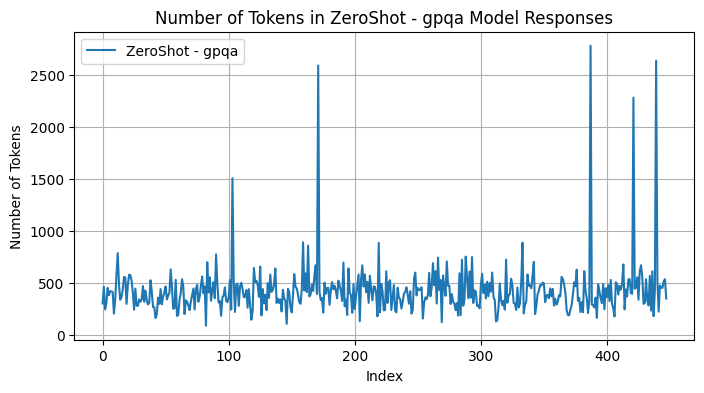

Number of spikes in ZeroShot - gpqa: 5


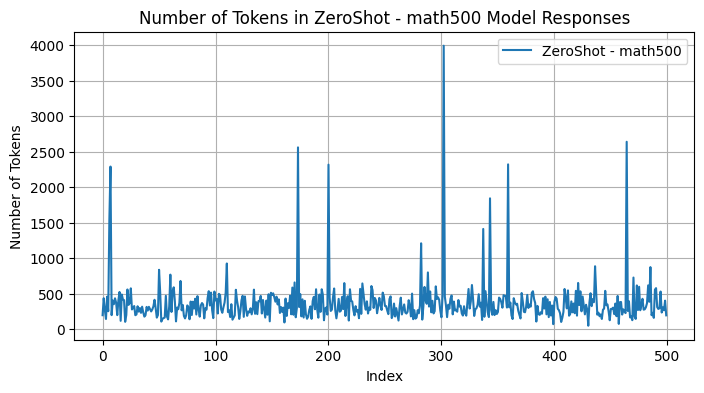

Number of spikes in ZeroShot - math500: 9
COD


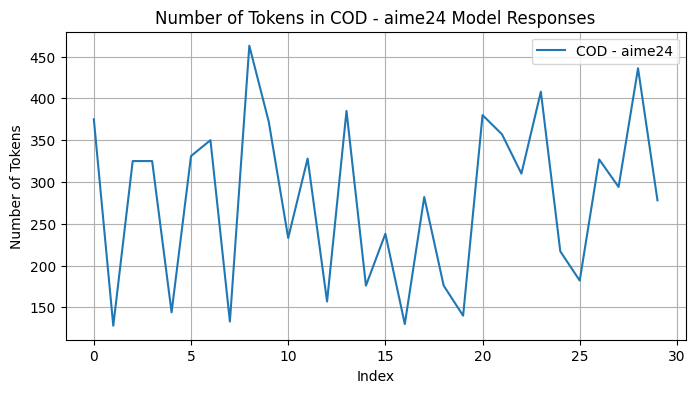

Number of spikes in COD - aime24: 0


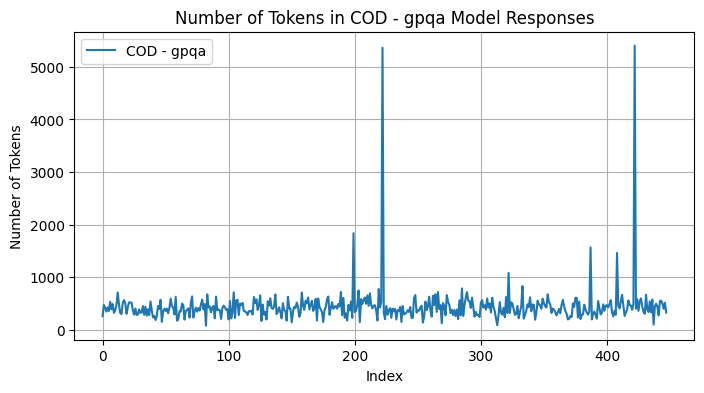

Number of spikes in COD - gpqa: 5


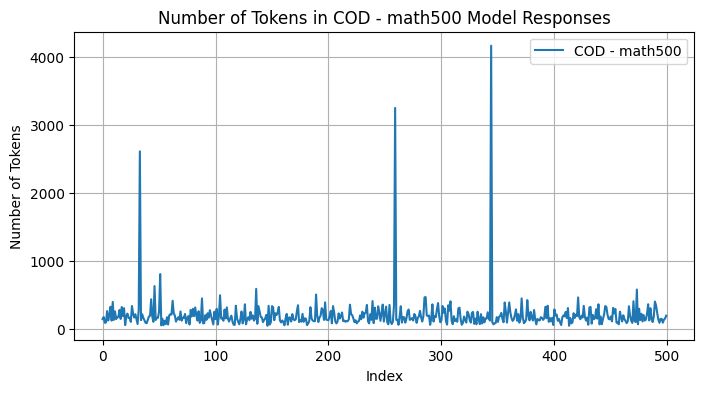

Number of spikes in COD - math500: 4
SFT_1e4


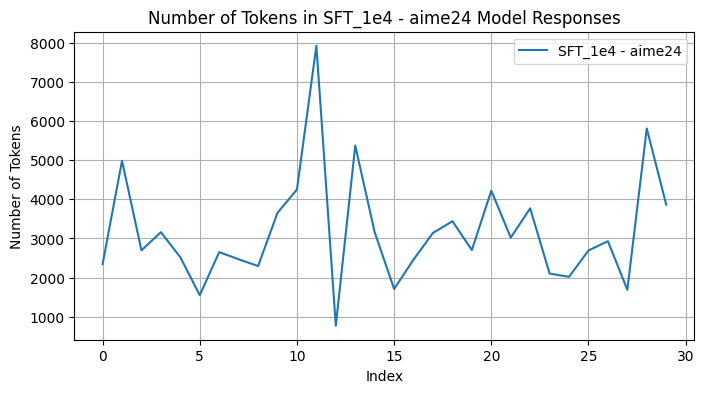

Number of spikes in SFT_1e4 - aime24: 0


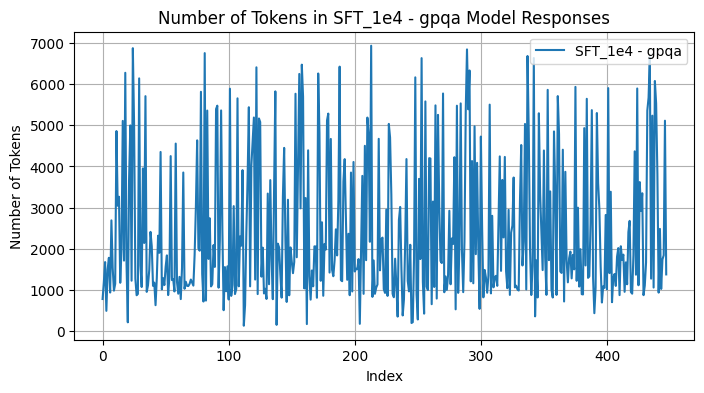

Number of spikes in SFT_1e4 - gpqa: 0


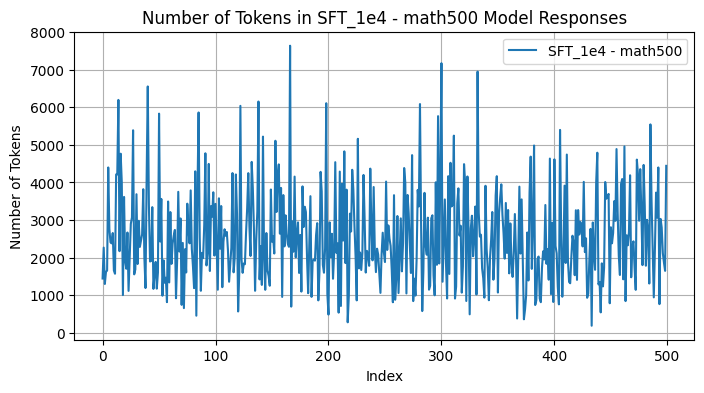

Number of spikes in SFT_1e4 - math500: 0
SFT_1e5


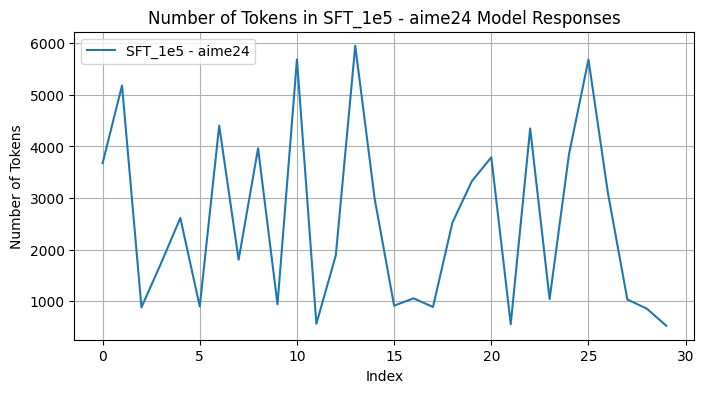

Number of spikes in SFT_1e5 - aime24: 0


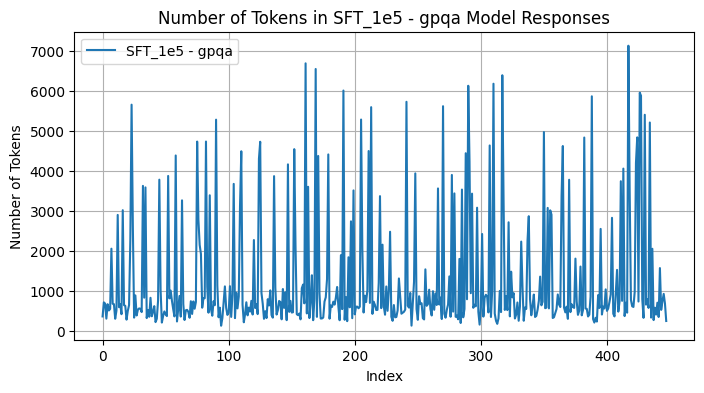

Number of spikes in SFT_1e5 - gpqa: 60


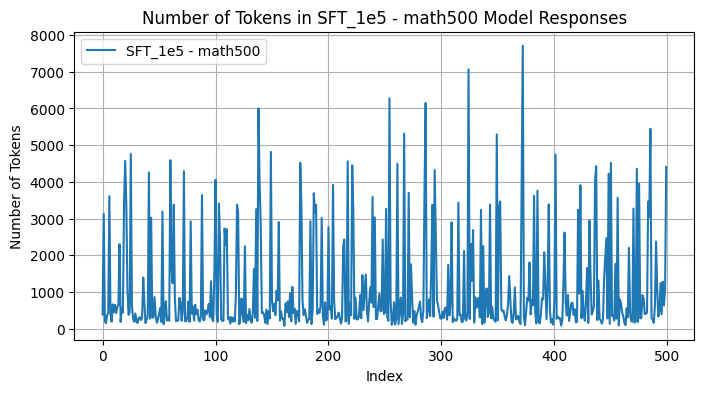

Number of spikes in SFT_1e5 - math500: 74
SFT_1e6


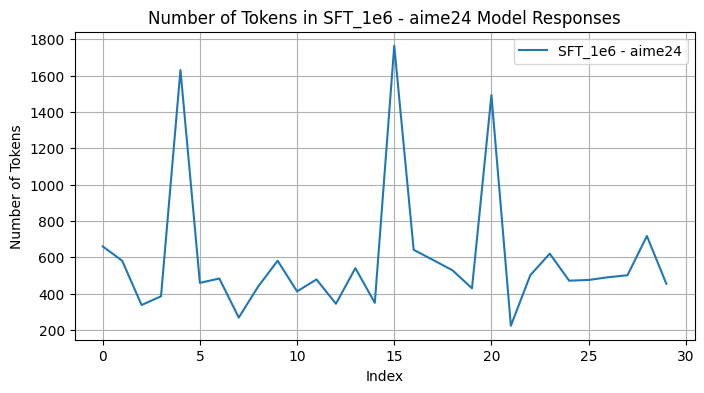

Number of spikes in SFT_1e6 - aime24: 3


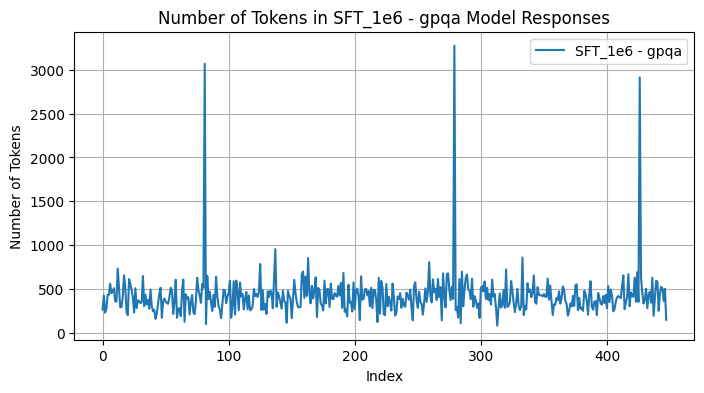

Number of spikes in SFT_1e6 - gpqa: 3


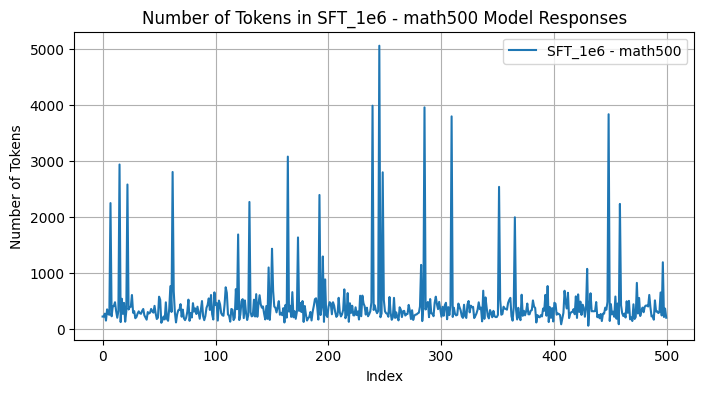

Number of spikes in SFT_1e6 - math500: 20
SFT_2e4


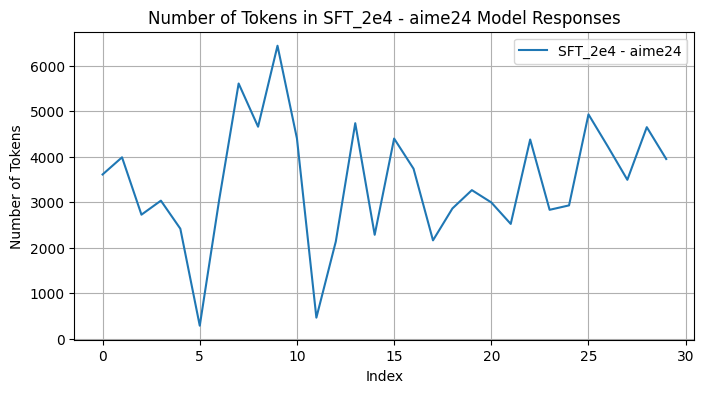

Number of spikes in SFT_2e4 - aime24: 0


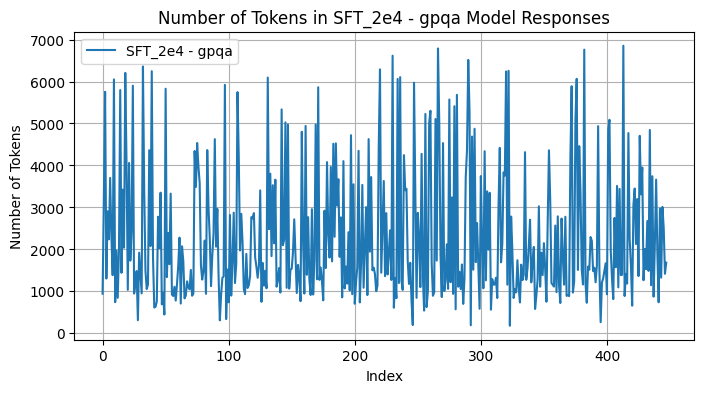

Number of spikes in SFT_2e4 - gpqa: 0


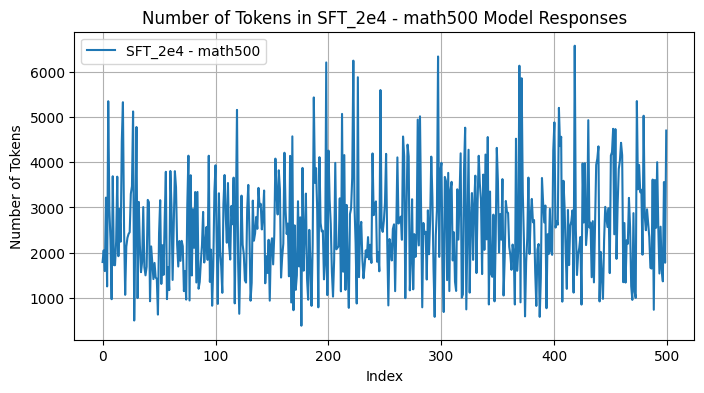

Number of spikes in SFT_2e4 - math500: 0
SFT_5e6


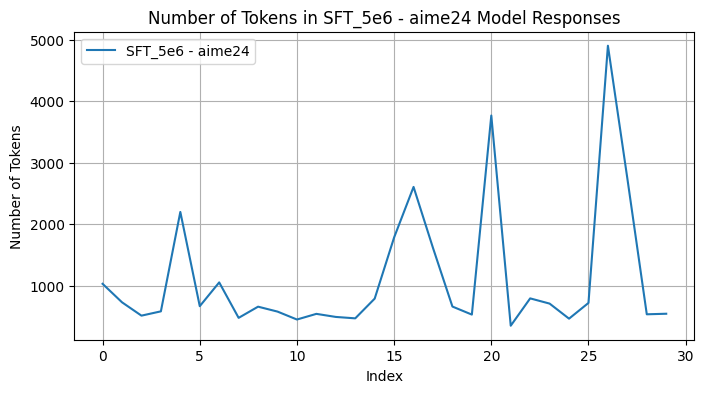

Number of spikes in SFT_5e6 - aime24: 4


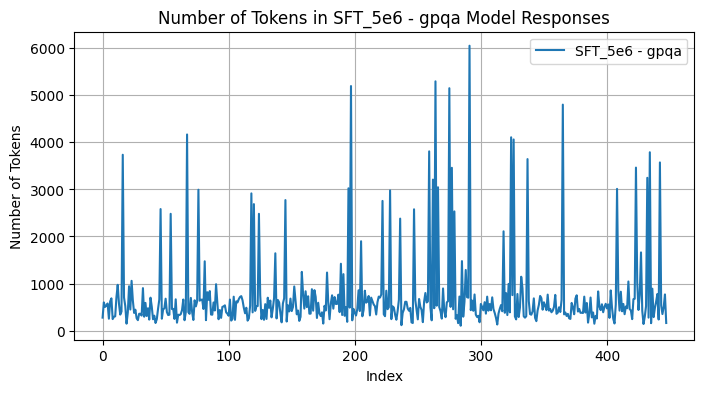

Number of spikes in SFT_5e6 - gpqa: 32


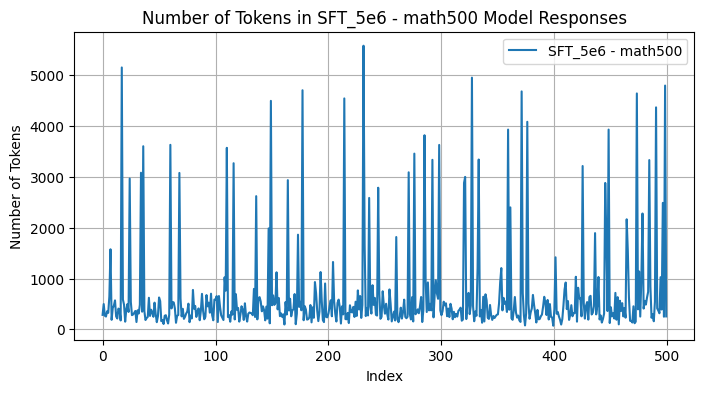

Number of spikes in SFT_5e6 - math500: 44
R1


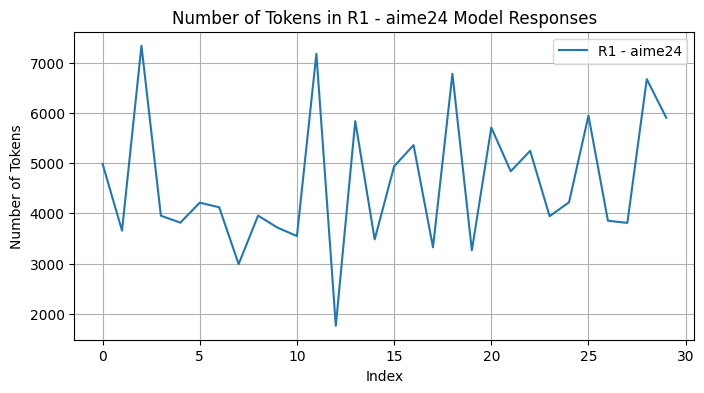

Number of spikes in R1 - aime24: 0


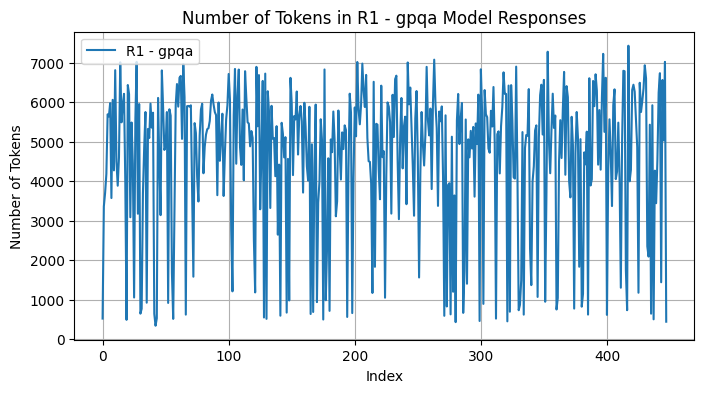

Number of spikes in R1 - gpqa: 0


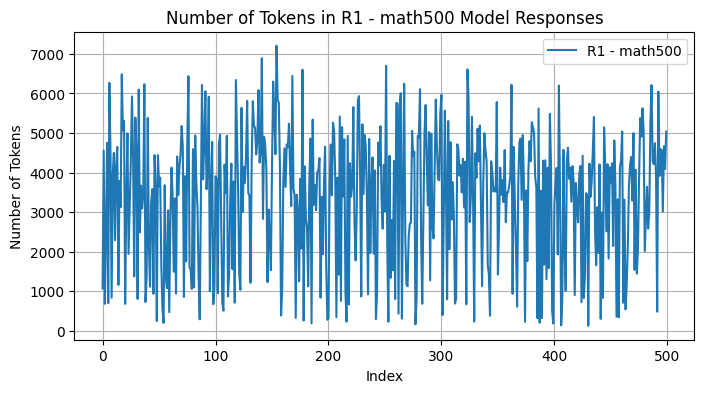

Number of spikes in R1 - math500: 0


In [3]:
datasets = ["aime24", "gpqa", "math500"]


for prompt_type, dataset_paths in file_paths.items():
    print(prompt_type)
    for dataset in datasets:
        try:
            file_path = dataset_paths[dataset]
            df = pd.read_csv(file_path)

            # Calculate number of tokens
            df["num_tokens"] = df["model_response"].apply(
                lambda x: len(x.split()) if isinstance(x, str) else 0
            )  # Handle potential NaN values

            # Create the plot
            plt.figure(figsize=(8, 4))
            plt.plot(df["num_tokens"], label=f"{prompt_type} - {dataset}")
            plt.title(f"Number of Tokens in {prompt_type} - {dataset} Model Responses")
            plt.xlabel("Index")
            plt.ylabel("Number of Tokens")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Count spikes using MAD
            tokens = df["num_tokens"]
            median_tokens = tokens.median()
            mad = np.median(np.abs(tokens - median_tokens))

            #Handle the zero MAD, avoid ZeroDivisionError
            if mad == 0:
                threshold = median_tokens + (10 * tokens.std()) # Fallback to std dev if MAD is zero.
            
            else:
                threshold = median_tokens + (10 * mad)  # Adjust the multiplier as needed


            num_spikes = (tokens > threshold).sum()
            print(f"Number of spikes in {prompt_type} - {dataset}: {num_spikes}")

        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except KeyError as e:
            print(f"KeyError: {e} in {file_path}. Check column names.")
        except Exception as e:
            print(f"An unexpected error occurred processing {file_path}: {e}")

In [15]:
import re
from collections import Counter

def detect_repetition(text, min_chunk_size=50, max_chunk_size=500, threshold=3):
    """
    Detect if a text contains repeated chunks, suggesting an infinite loop in model output.
    
    Parameters:
    -----------
    text : str
        The model output text to analyze
    min_chunk_size : int, optional
        Minimum size of chunks to consider (default: 50 characters)
    max_chunk_size : int, optional
        Maximum size of chunks to consider (default: 500 characters)
    threshold : int, optional
        Minimum number of repetitions to consider as an infinite loop (default: 3)
        
    Returns:
    --------
    dict
        Information about detected repetitions, including:
        - has_repetition: Boolean indicating if repetition was detected
        - most_repeated: The most frequently repeated chunk
        - repetition_count: Number of times the most frequent chunk appears
        - repetition_locations: Indices where repetitions start
        - percentage_repetitive: Percentage of the text that consists of repetitions
    """
    results = {
        "has_repetition": False,
        "most_repeated": "",
        "repetition_count": 0,
        "repetition_locations": [],
        "percentage_repetitive": 0.0
    }
    
    # For very short texts, skip analysis
    if len(text) < min_chunk_size * threshold:
        return results
    
    # Try different chunk sizes to detect repetitions
    for chunk_size in range(min_chunk_size, min(max_chunk_size, len(text) // threshold)):
        # Create all possible chunks of the current size
        chunks = [text[i:i+chunk_size] for i in range(len(text) - chunk_size + 1)]
        
        # Count occurrences of each chunk
        chunk_counter = Counter(chunks)
        most_common = chunk_counter.most_common(1)[0]
        
        # If we find a chunk repeated more than threshold times
        if most_common[1] >= threshold:
            chunk = most_common[0]
            count = most_common[1]
            
            # Find all occurrences of the chunk
            locations = [m.start() for m in re.finditer(re.escape(chunk), text)]
            
            # Calculate how much of the text is repetitive
            repetitive_chars = len(chunk) * count
            percentage = (repetitive_chars / len(text)) * 100
            
            # Update results if this is more repetitive than previously found
            if count > results["repetition_count"]:
                results.update({
                    "has_repetition": True,
                    "most_repeated": chunk,
                    "repetition_count": count,
                    "repetition_locations": locations,
                    "percentage_repetitive": percentage
                })
    
    return results


def analyze_model_output(text):
    """
    Analyze model output for signs of infinite loops or repetition.
    Produces a readable report of the analysis.
    
    Parameters:
    -----------
    text : str
        The model output text to analyze
        
    Returns:
    --------
    str
        A human-readable analysis report
    """
    results = detect_repetition(text)
    
    if not results["has_repetition"]:
        return "No significant repetition detected in the model output."
    
    report = [
        "REPETITION DETECTED: The model appears to be in an infinite loop.",
        f"• The text contains a chunk repeated {results['repetition_count']} times.",
        f"• Approximately {results['percentage_repetitive']:.1f}% of the output is repetitive.",
        f"• The repeated chunk begins with: \"{results['most_repeated'][:50]}...\""
    ]
    
    # Add recommendations based on severity
    if results["percentage_repetitive"] > 50:
        report.append("\nRECOMMENDATION: The model is severely stuck in a loop. This output should be discarded.")
    else:
        report.append("No significant repetition detected in the model output.")
        # report.append("\nRECOMMENDATION: The model shows signs of repetition. Consider truncating the output at the first instance of repetition.")
    
    return "\n".join(report)


# print(analyze_model_output(sample))

In [16]:
for index, row in aime24_df.iterrows():
    report = analyze_model_output(row["model_response"])
    if "No significant repetition detected in the model output." in report:
        continue
    print(f"Index: {index}")
    print(report)
    print("-----------------------------")

Index: 10
REPETITION DETECTED: The model appears to be in an infinite loop.
• The text contains a chunk repeated 7820 times.
• Approximately 4248.2% of the output is repetitive.
• The repeated chunk begins with: "00000000000000000000000000000000000000000000000000..."

RECOMMENDATION: The model is severely stuck in a loop. This output should be discarded.
-----------------------------
Index: 20
REPETITION DETECTED: The model appears to be in an infinite loop.
• The text contains a chunk repeated 893 times.
• Approximately 342.5% of the output is repetitive.
• The repeated chunk begins with: "2i \cdot 6 = 12i \cdot 6 = 12i \cdot 6 = 12i \cdot..."

RECOMMENDATION: The model is severely stuck in a loop. This output should be discarded.
-----------------------------
Index: 103
REPETITION DETECTED: The model appears to be in an infinite loop.
• The text contains a chunk repeated 330 times.
• Approximately 70.8% of the output is repetitive.
• The repeated chunk begins with: "}\right) = \lambd